# Read me

This code should be run as "Run all" at once <br>

## Summary
Dataset<br>
Reference for methodology<br>
1) Accessing data using pandas<br>
2) Integration of EPA categories in the dataset<br>
3) Plots<br>


# Dataset
Pollution in US open dataset: https://www.kaggle.com/sogun3/uspollution


# Reference for methodology:

## Air Quality Index (AQI) Basics, EPA
https://cfpub.epa.gov/airnow/index.cfm?action=aqibasics.aqi <br>
0 to 50	Good	
51 to 100	Moderate	
101 to 150	Unhealthy for Sensitive Groups	
151 to 200	Unhealthy	
201 to 300	Very Unhealthy	
301 to 500	Hazardous	

In [1]:
import requests

url = "https://www.kaggle.com/sogun3/uspollution/downloads/uspollution.zip/1"
filename = url.split("/")[-1]
with open(filename, "wb") as f:
    r = requests.get(url)
    f.write(r.content)

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import math
%matplotlib inline

#import the plot function
from plot3_1 import plot31
from plot3_2 import plot32
from plot3_3 import plot33
from plot3_4 import plot34
from plot3_5 import plot35
from plot3_6 import plot36

import zipfile
with zipfile.ZipFile('uspollution.zip') as zip:
    with zip.open('pollution_us_2000_2016.csv') as myZip:
        df = pd.read_csv(myZip) 

# 1) Accessing data using pandas

In [2]:
# Accessing and visualizing data info using pandas

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746661 entries, 0 to 1746660
Data columns (total 29 columns):
Unnamed: 0           int64
State Code           int64
County Code          int64
Site Num             int64
Address              object
State                object
County               object
City                 object
Date Local           object
NO2 Units            object
NO2 Mean             float64
NO2 1st Max Value    float64
NO2 1st Max Hour     int64
NO2 AQI              int64
O3 Units             object
O3 Mean              float64
O3 1st Max Value     float64
O3 1st Max Hour      int64
O3 AQI               int64
SO2 Units            object
SO2 Mean             float64
SO2 1st Max Value    float64
SO2 1st Max Hour     int64
SO2 AQI              float64
CO Units             object
CO Mean              float64
CO 1st Max Value     float64
CO 1st Max Hour      int64
CO AQI               float64
dtypes: float64(10), int64(10), object(9)
memory usage: 386.5+ MB


In [4]:
df.head(5)

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


# 2) Integration of EPA categories in the dataset

In [5]:
# Creates new column in the dataset to integrate EPA categories for air quality (see reference for methodology)

In [6]:
NO2_AQI = df['NO2 AQI'].values
NO2_AQI.reshape(1,1746661)
O3_AQI = df['O3 AQI'].values
O3_AQI.reshape(1,1746661)
CO_AQI = df['CO AQI'].values
CO_AQI.reshape(1,1746661)
SO2_AQI = df['SO2 AQI'].values
SO2_AQI.reshape(1,1746661)
all_air = np.vstack((NO2_AQI,O3_AQI,CO_AQI,SO2_AQI))
all_air
all_air = np.nan_to_num(all_air)
max_AQI = np.nanmax(all_air, axis = 0)
df['MAX_AQI'] = pd.DataFrame(max_AQI) 
df['EPA'] = 'm'
# Creating a column that classify the air quality according to EPA categories
df.loc[(df.MAX_AQI<=50.0) & (df.MAX_AQI>=0.0), ['EPA']] = 'Good'
df.loc[(df.MAX_AQI>50.0) & (df.MAX_AQI<=100.0), ['EPA']] = 'Moderate'
df.loc[(df.MAX_AQI>100.0) & (df.MAX_AQI<=150.0), ['EPA']] = 'Unhealthy for Sensitive Groups'
df.loc[(df.MAX_AQI>150.0) & (df.MAX_AQI<=200.0), ['EPA']] = 'Unhealthy'
df.loc[(df.MAX_AQI>200.0) & (df.MAX_AQI<=300.0), ['EPA']] = 'Very Unhealthy'
df.loc[(df.MAX_AQI>300.0) & (df.MAX_AQI<=500.0), ['EPA']] = 'Hazardous'

In [7]:
df.groupby(['EPA'])['EPA'].count()

EPA
Good                              1482671
Moderate                           225287
Unhealthy                            3722
Unhealthy for Sensitive Groups      34707
Very Unhealthy                        274
Name: EPA, dtype: int64

# 3 Plots

## 3.1 States with highest average AQI 2011-2015

In [8]:
df['Date Local'] = pd.to_datetime(df['Date Local'])

#filter the data from 2011-2015
ydf = df[(df['Date Local'].dt.year <= 2015) & (df['Date Local'].dt.year >= 2011)]

In [9]:
top_10_state = ydf.groupby('State')['MAX_AQI'].mean().sort_values(ascending=False).head(10)

plot "States with highest average AQI 2011-2015"

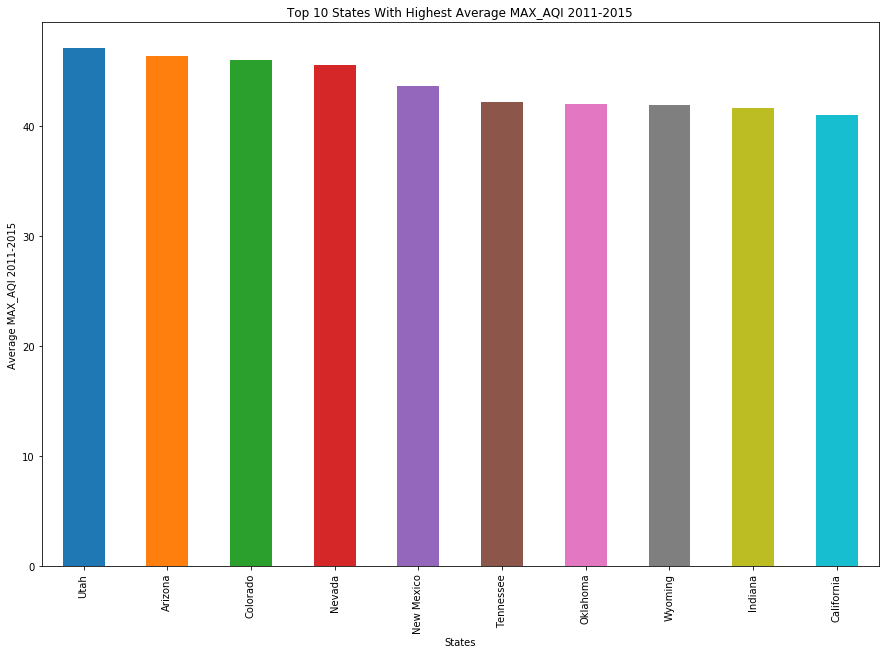

In [10]:
plot31(top_10_state)

## 3.2 US VS CA

In [11]:
#ydf: USA data from 2011-2015
#CA_ydf: data from 2011-2015
CA_ydf = ydf.loc[df.State == 'California']
CA_ydf.head()

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,MAX_AQI,EPA
1081788,9406,6,1,11,1100 21st Street,California,Alameda,Oakland,2011-01-01,Parts per billion,...,0.7,0,0.0,Parts per million,0.156522,0.2,0,NaN,18.0,Good
1081789,9407,6,1,11,1100 21st Street,California,Alameda,Oakland,2011-01-01,Parts per billion,...,0.7,0,0.0,Parts per million,0.150000,0.2,15,2.0,18.0,Good
1081790,9408,6,1,11,1100 21st Street,California,Alameda,Oakland,2011-01-01,Parts per billion,...,0.7,2,NaN,Parts per million,0.156522,0.2,0,NaN,18.0,Good
1081791,9409,6,1,11,1100 21st Street,California,Alameda,Oakland,2011-01-01,Parts per billion,...,0.7,2,NaN,Parts per million,0.150000,0.2,15,2.0,18.0,Good
1081792,9410,6,1,11,1100 21st Street,California,Alameda,Oakland,2011-01-02,Parts per billion,...,0.6,0,0.0,Parts per million,0.113043,0.2,0,NaN,20.0,Good


In [12]:
CA_ydf.loc[CA_ydf.EPA== "Very Unhealthy", "EPA"] = "Unhealthy"
ydf.loc[ydf.EPA== "Very Unhealthy", "EPA"] = "Unhealthy"
CA_ydf.EPA.value_counts()

C:\Users\hczhu\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Good                              147874
Moderate                           19742
Unhealthy for Sensitive Groups      4706
Unhealthy                            788
Name: EPA, dtype: int64

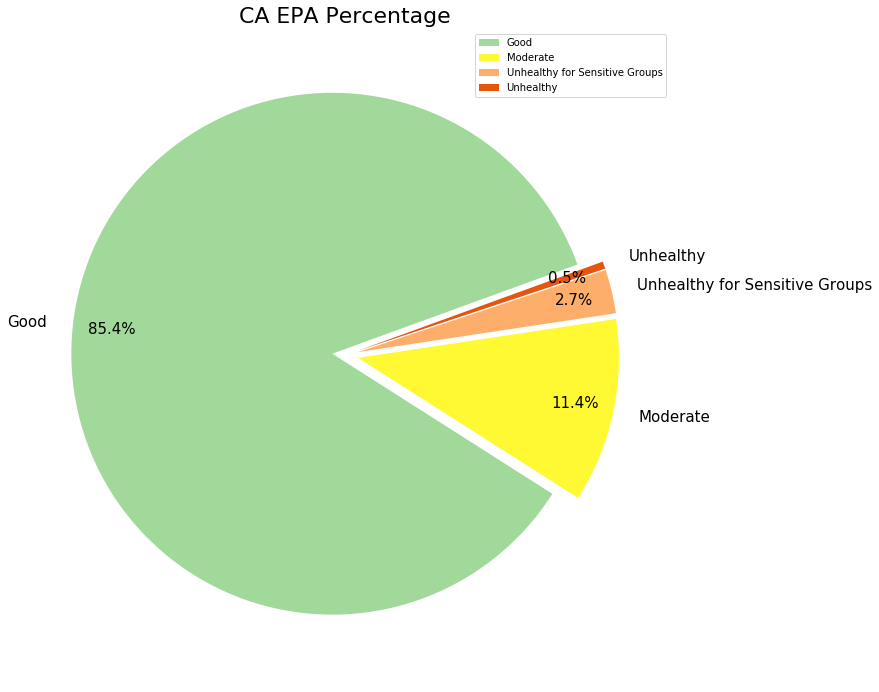

In [13]:
#CA_ydf.EPA pie chart
plot32(CA_ydf.EPA.value_counts())

In [14]:
ydf.EPA.value_counts()

Good                              571411
Moderate                           68284
Unhealthy for Sensitive Groups      9006
Unhealthy                            974
Name: EPA, dtype: int64

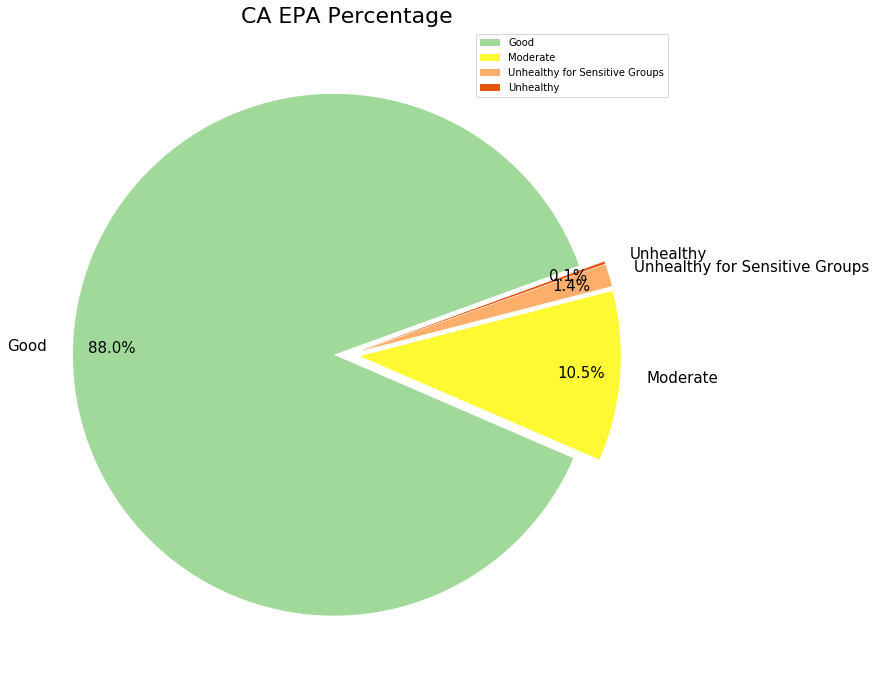

In [15]:
#US.EPA pie chart
plot32(ydf.EPA.value_counts())

## 3.3 Number of recorded year for per state

In [16]:
df['Year'] = df['Date Local'].dt.year
A = df.groupby(['State','Year'])['Year'].count()

In [17]:
len_year = A.groupby('State').count()
len_year.head()

State
Alabama        4
Alaska         2
Arizona       17
Arkansas      10
California    17
Name: Year, dtype: int64

plot Number of recorded year for per state

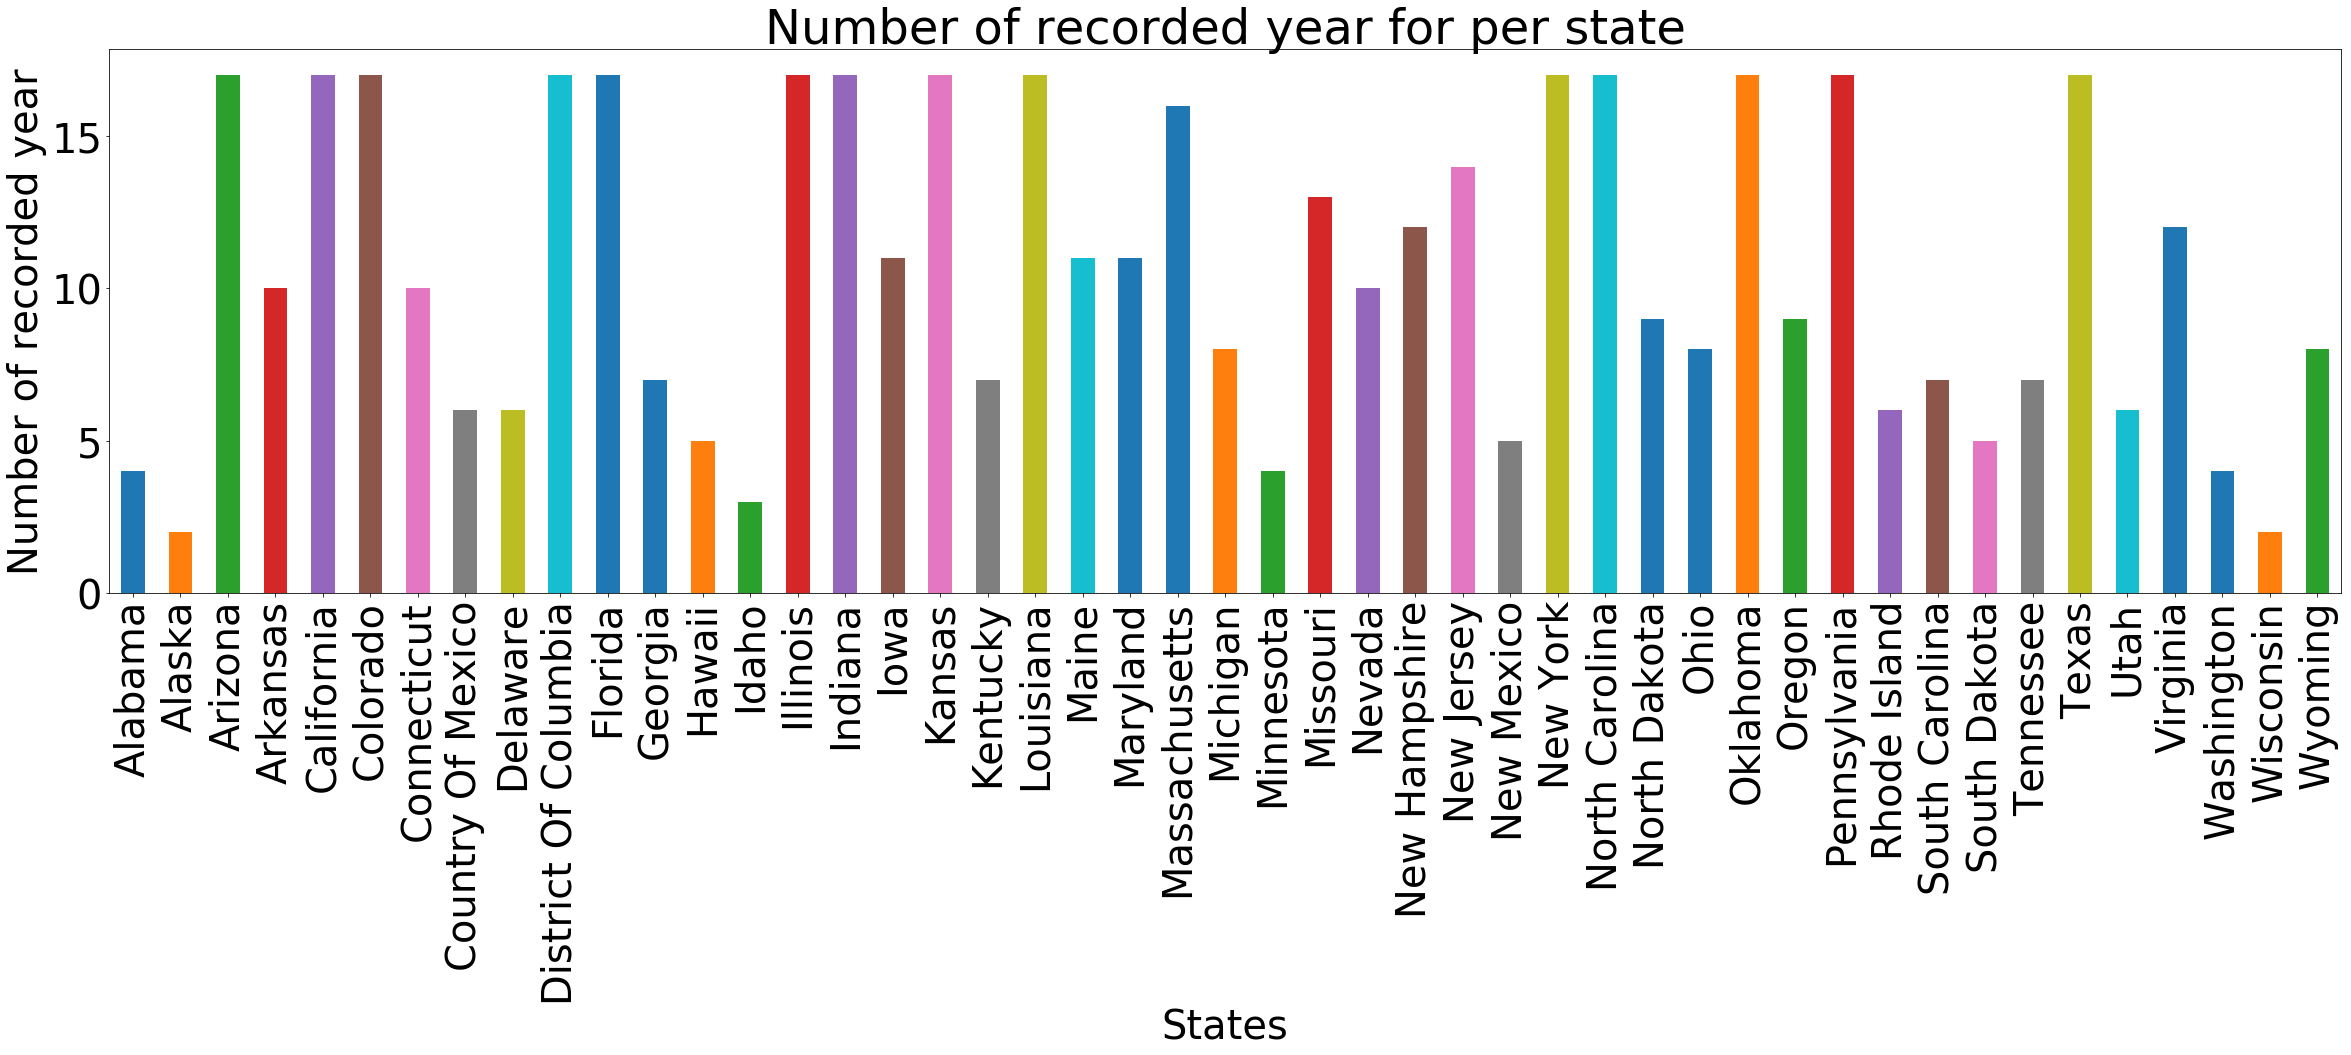

In [18]:
plot33(len_year)

## 3.4 Air quality measurements per year in CA per category

EPA percentage CA

In [19]:
CA_df_states=df.loc[df['State'] == "California"]
groupby = CA_df_states.groupby(['Year','EPA'])
CA_EPA = groupby['EPA'].count().unstack()
CA_EPA.fillna(0,inplace=True)
CA_EPA['SUM'] = CA_EPA.sum(axis=1)
CA_EPA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 2000 to 2016
Data columns (total 6 columns):
Good                              17 non-null float64
Moderate                          17 non-null float64
Unhealthy                         17 non-null float64
Unhealthy for Sensitive Groups    17 non-null float64
Very Unhealthy                    17 non-null float64
SUM                               17 non-null float64
dtypes: float64(6)
memory usage: 952.0 bytes


In [20]:
CA_EPA['Good'] = CA_EPA['Good']/CA_EPA['SUM']
CA_EPA['Moderate'] = CA_EPA['Moderate']/CA_EPA['SUM']
CA_EPA['Unhealthy'] = CA_EPA['Unhealthy']/CA_EPA['SUM']
CA_EPA['Unhealthy for Sensitive Groups'] = CA_EPA['Unhealthy for Sensitive Groups']/CA_EPA['SUM']
CA_EPA['Very Unhealthy'] = CA_EPA['Very Unhealthy']/CA_EPA['SUM']
CA_EPA=CA_EPA.drop(['SUM'], axis=1)
#drop 2016 due to incomplete data in 2016
CA_EPA=CA_EPA.drop(2016)
CA_EPA_column = list(CA_EPA.columns.values)

EPA percentage TOP polluted city in CA

In [21]:
Cities_CA=['Los Angeles', 'Long Beach', 'San Diego', 'Fresno','Carlsbad']
Cities_CA_df =  df.loc[df['City'].isin(Cities_CA)]
groupby = Cities_CA_df.groupby(['Year','EPA'])
Top_CA_EPA = groupby['EPA'].count().unstack()
Top_CA_EPA.fillna(0,inplace=True)
Top_CA_EPA['SUM'] = Top_CA_EPA.sum(axis=1)
Top_CA_EPA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 2000 to 2016
Data columns (total 6 columns):
Good                              17 non-null float64
Moderate                          17 non-null float64
Unhealthy                         17 non-null float64
Unhealthy for Sensitive Groups    17 non-null float64
Very Unhealthy                    17 non-null float64
SUM                               17 non-null float64
dtypes: float64(6)
memory usage: 952.0 bytes


In [22]:
Top_CA_EPA['Good'] = Top_CA_EPA['Good']/Top_CA_EPA['SUM']
Top_CA_EPA['Moderate'] = Top_CA_EPA['Moderate']/Top_CA_EPA['SUM']
Top_CA_EPA['Unhealthy'] = Top_CA_EPA['Unhealthy']/Top_CA_EPA['SUM']
Top_CA_EPA['Unhealthy for Sensitive Groups'] = Top_CA_EPA['Unhealthy for Sensitive Groups']/Top_CA_EPA['SUM']
Top_CA_EPA['Very Unhealthy'] = Top_CA_EPA['Very Unhealthy']/Top_CA_EPA['SUM']
Top_CA_EPA=Top_CA_EPA.drop(['SUM'], axis=1)
#drop 2016 due to incomplete data in 2016
Top_CA_EPA = Top_CA_EPA.drop(2016)
Top_CA_EPA_column = list(Top_CA_EPA.columns.values)

EPA percentage SD

In [23]:
SD = CA_df_states.loc[df['City'] == "San Diego"]
groupby = SD.groupby(['Year','EPA'])
SD_EPA = groupby['EPA'].count().unstack()
SD_EPA.fillna(0,inplace=True)
y = [y for y in range(2000,2016)]
Year = SD_EPA.index.tolist()
for i in y:
    if i not in Year:
        SD_EPA.loc[i] = [0, 0, 0]
SD_EPA['SUM'] = SD_EPA.sum(axis=1)
SD_EPA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 2000 to 2015
Data columns (total 4 columns):
Good                              16 non-null float64
Moderate                          16 non-null float64
Unhealthy for Sensitive Groups    16 non-null float64
SUM                               16 non-null float64
dtypes: float64(4)
memory usage: 640.0 bytes


In [24]:
SD_EPA['Good'] = SD_EPA['Good']/SD_EPA['SUM']
SD_EPA['Moderate'] = SD_EPA['Moderate']/SD_EPA['SUM']
SD_EPA['Unhealthy for Sensitive Groups'] = SD_EPA['Unhealthy for Sensitive Groups']/SD_EPA['SUM']
SD_EPA = SD_EPA.drop(['SUM'], axis=1)
SD_EPA.fillna(0,inplace=True)
SD_EPA_column = list(SD_EPA.columns.values)

EPA percentage LA

In [25]:
LA = CA_df_states.loc[df['City'] == "Los Angeles"]
groupby = LA.groupby(['Year','EPA'])
LA_EPA = groupby['EPA'].count().unstack()
LA_EPA.fillna(0,inplace=True)
LA_EPA['SUM'] = LA_EPA.sum(axis=1)
LA_EPA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 2000 to 2015
Data columns (total 5 columns):
Good                              16 non-null float64
Moderate                          16 non-null float64
Unhealthy                         16 non-null float64
Unhealthy for Sensitive Groups    16 non-null float64
SUM                               16 non-null float64
dtypes: float64(5)
memory usage: 768.0 bytes


In [26]:
LA_EPA['Good'] = LA_EPA['Good']/LA_EPA['SUM']
LA_EPA['Moderate'] = LA_EPA['Moderate']/LA_EPA['SUM']
LA_EPA['Unhealthy'] = LA_EPA['Unhealthy']/LA_EPA['SUM']
LA_EPA['Unhealthy for Sensitive Groups'] = LA_EPA['Unhealthy for Sensitive Groups']/LA_EPA['SUM']
LA_EPA = LA_EPA.drop(['SUM'], axis=1)
LA_EPA_column = list(LA_EPA.columns.values)

EPA percentage Fresno

In [27]:
F = CA_df_states.loc[df['City'] == "Fresno"]
groupby = F.groupby(['Year','EPA'])
F_EPA = groupby['EPA'].count().unstack()
F_EPA.fillna(0,inplace=True)
y = [y for y in range(2000,2016)]
Year = F_EPA.index.tolist()
for i in y:
    if i not in Year:
        F_EPA.loc[i] = [0,0,0,0,0]
F_EPA['SUM'] = F_EPA.sum(axis=1)
F_EPA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 2003 to 2006
Data columns (total 6 columns):
Good                              17 non-null float64
Moderate                          17 non-null float64
Unhealthy                         17 non-null float64
Unhealthy for Sensitive Groups    17 non-null float64
Very Unhealthy                    17 non-null float64
SUM                               17 non-null float64
dtypes: float64(6)
memory usage: 952.0 bytes


In [28]:
F_EPA['Good'] = F_EPA['Good']/F_EPA['SUM']
F_EPA['Moderate'] = F_EPA['Moderate']/F_EPA['SUM']
F_EPA['Unhealthy'] = F_EPA['Unhealthy']/F_EPA['SUM']
F_EPA['Unhealthy for Sensitive Groups'] = F_EPA['Unhealthy for Sensitive Groups']/F_EPA['SUM']
F_EPA['Very Unhealthy'] = F_EPA['Very Unhealthy']/F_EPA['SUM']
F_EPA = F_EPA.drop(['SUM'], axis=1)
F_EPA = F_EPA.drop(2016)
F_EPA.fillna(0,inplace=True)
F_EPA = F_EPA.sort_index()
F_EPA_column = list(F_EPA.columns.values)

Plot each plot for Air quality per year in CA and each city

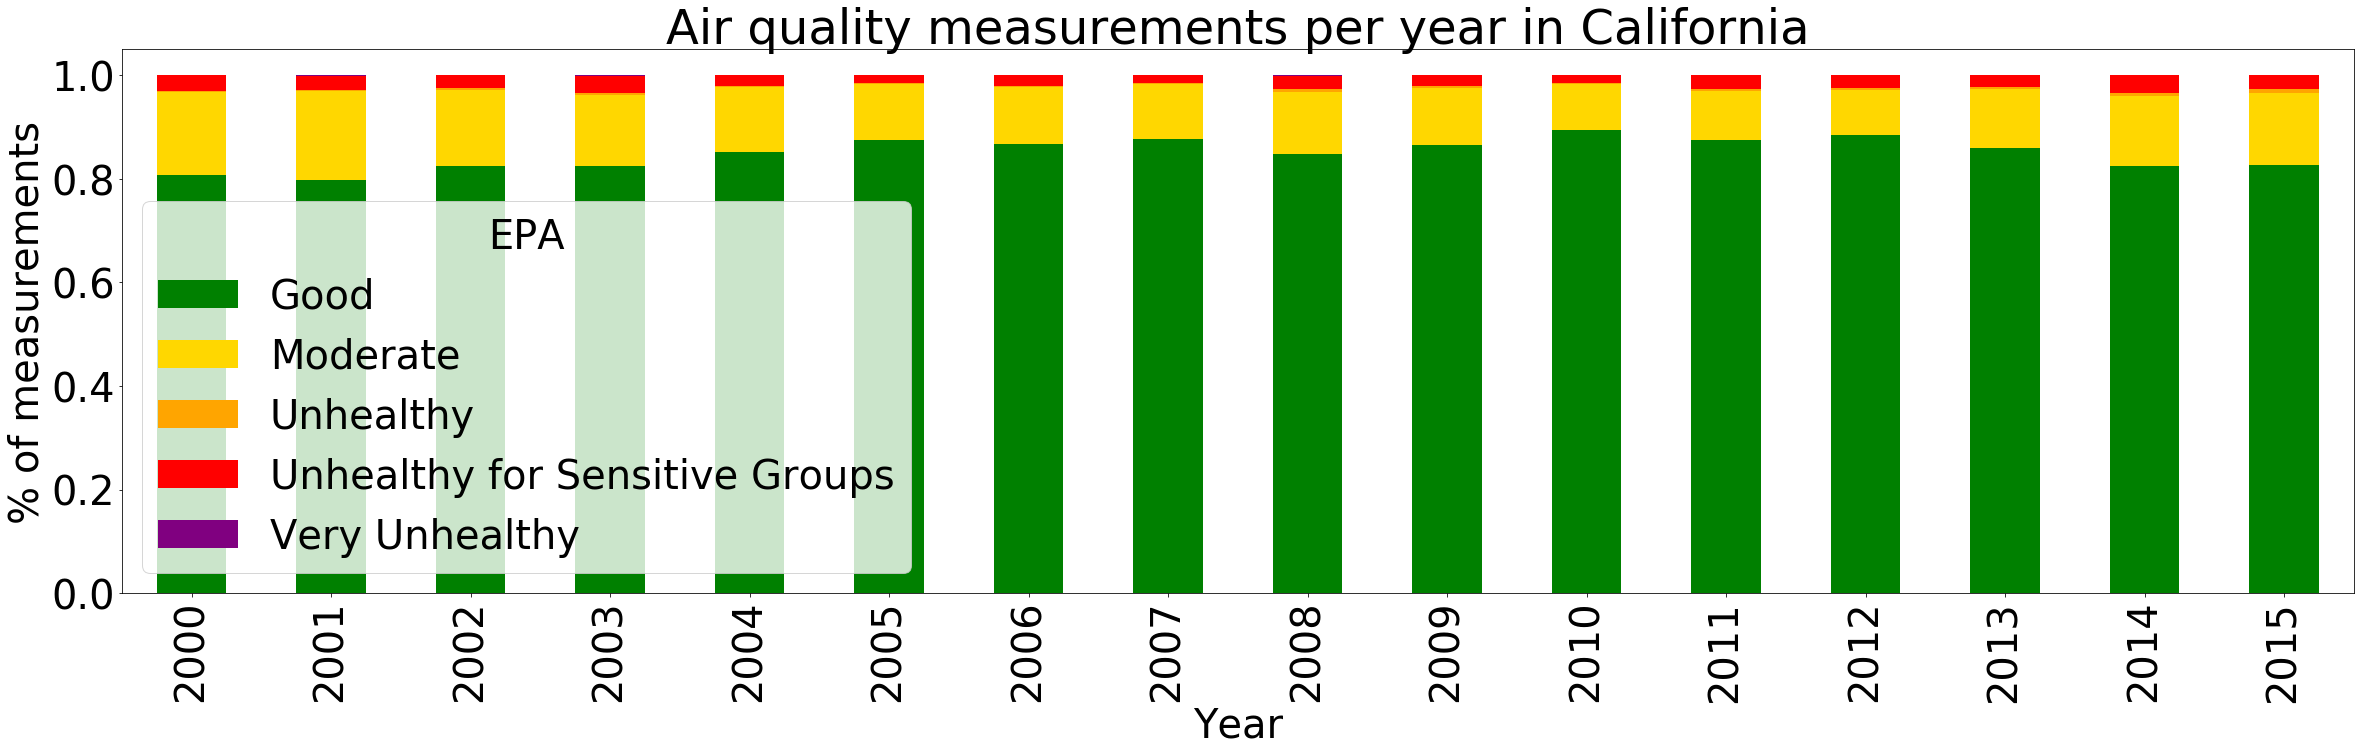

In [29]:
plot34(CA_EPA, CA_EPA_column,"California")

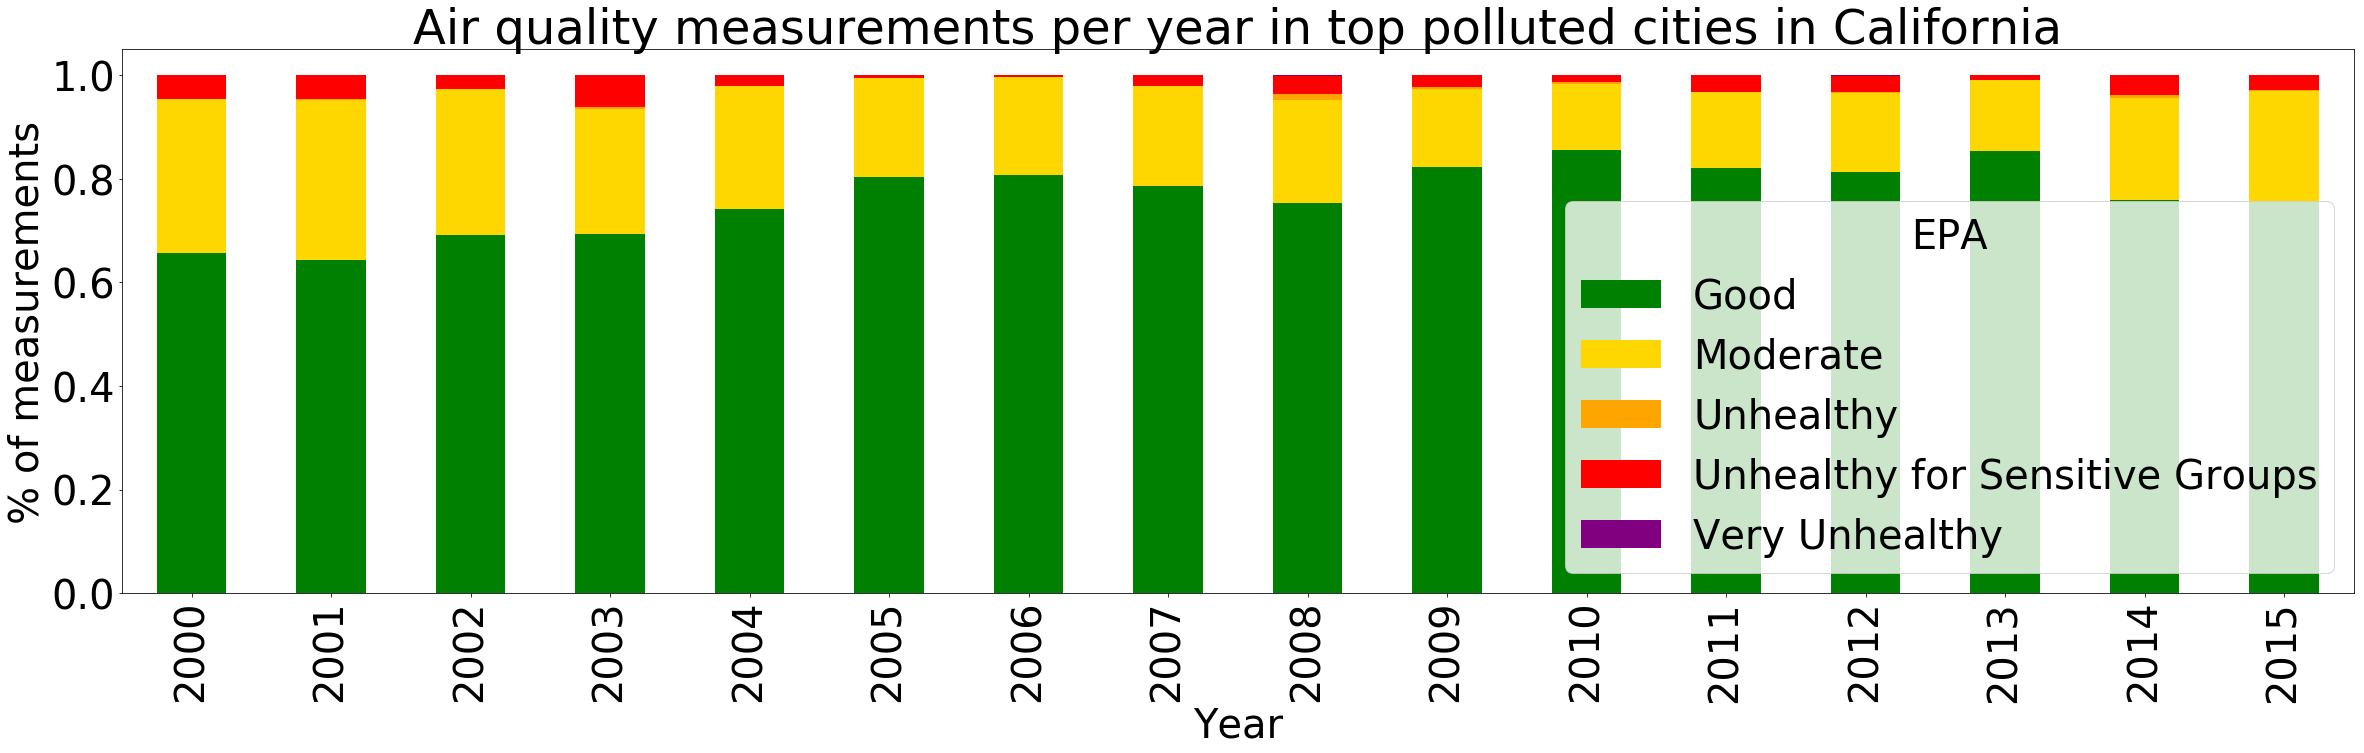

In [30]:
plot34(Top_CA_EPA, Top_CA_EPA_column, "top polluted cities in California")

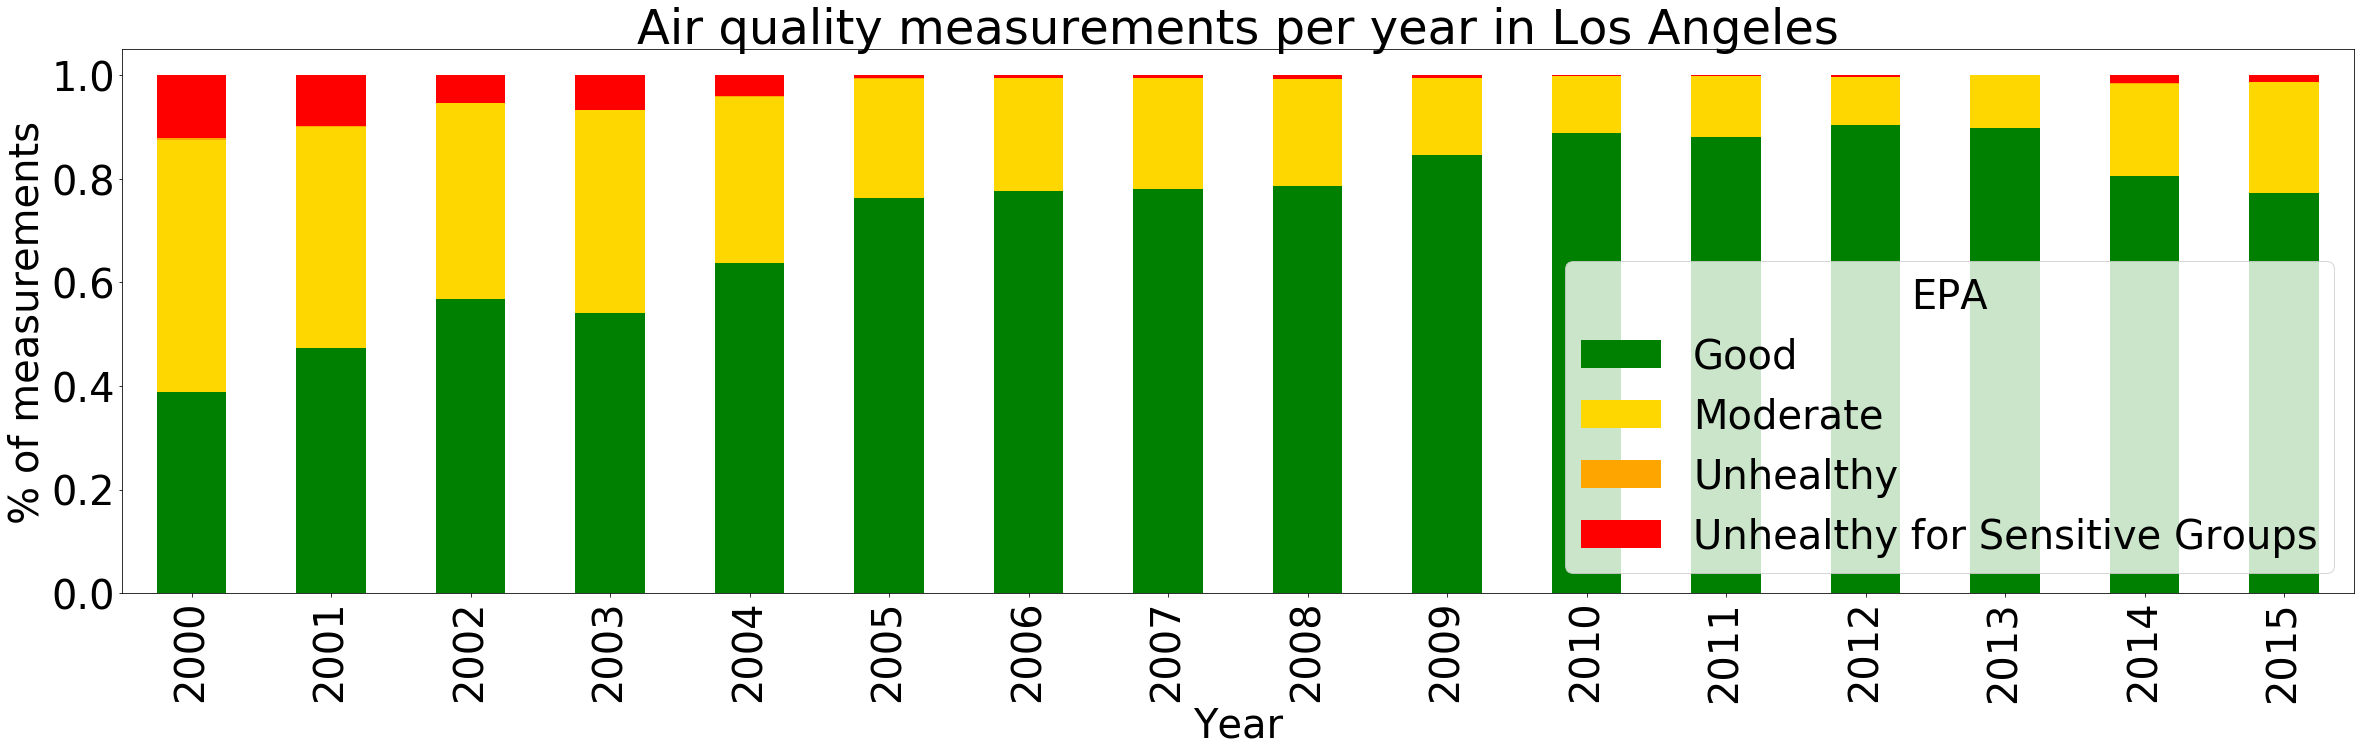

In [31]:
plot34(LA_EPA,LA_EPA_column,"Los Angeles")

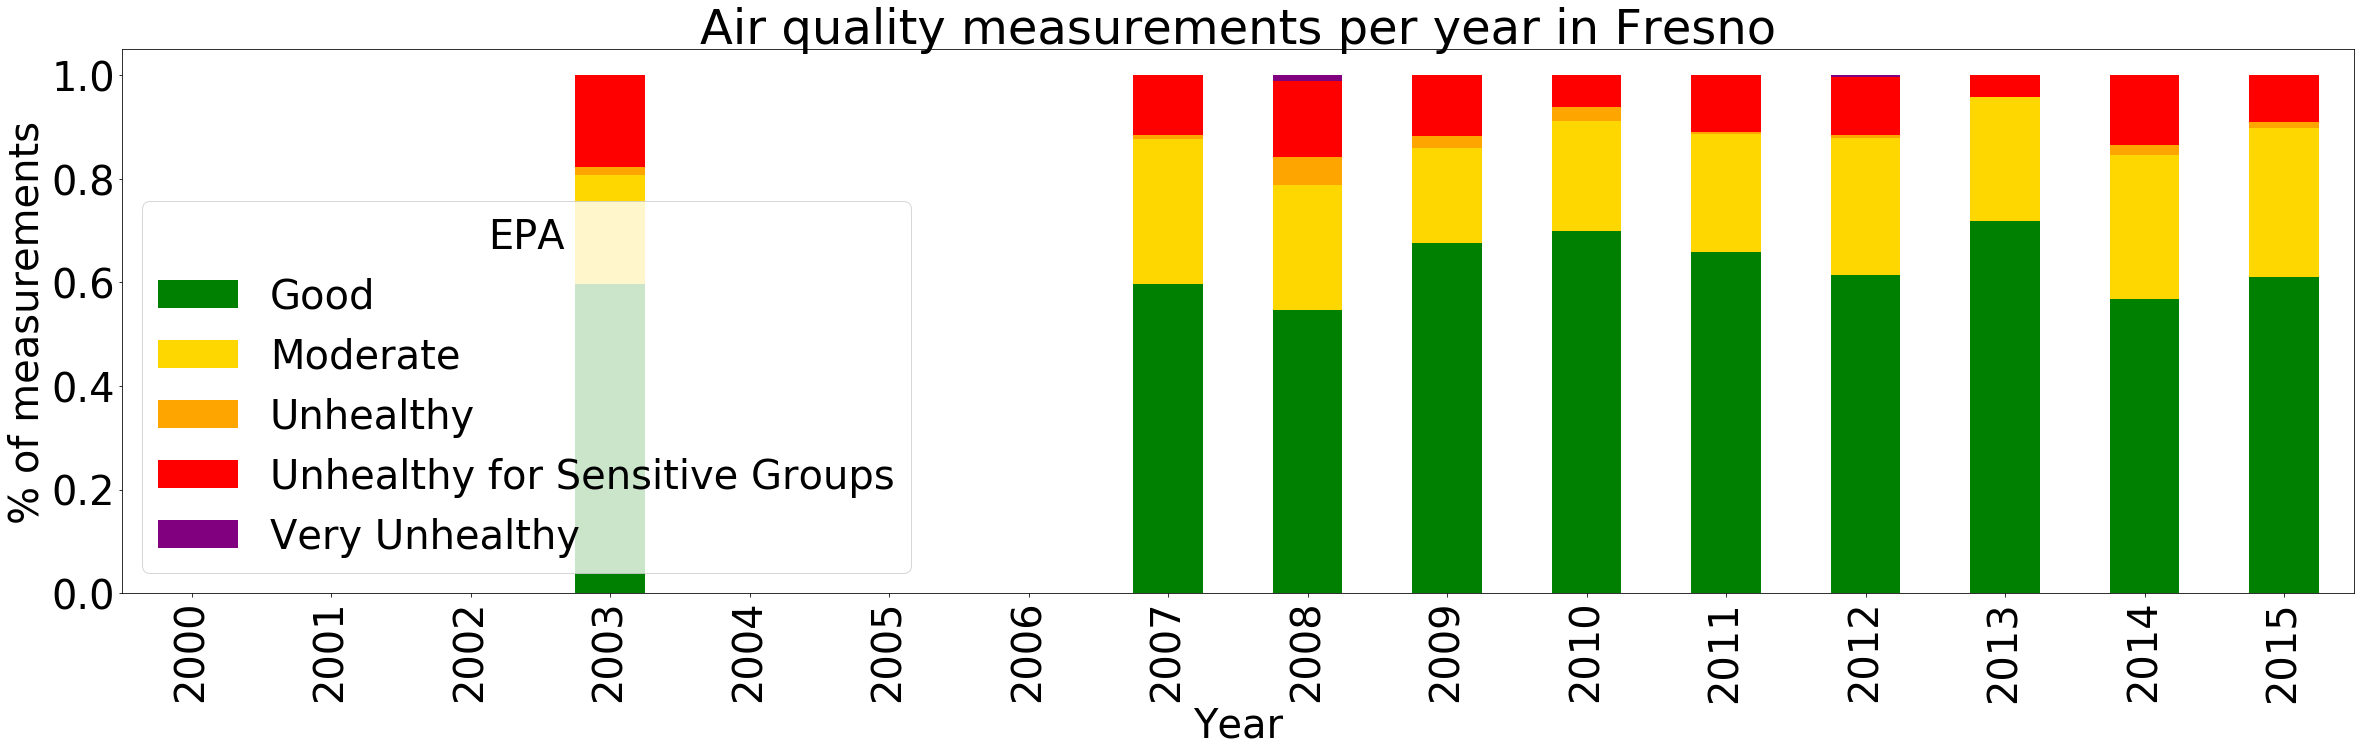

In [32]:
plot34(F_EPA, F_EPA_column,"Fresno")

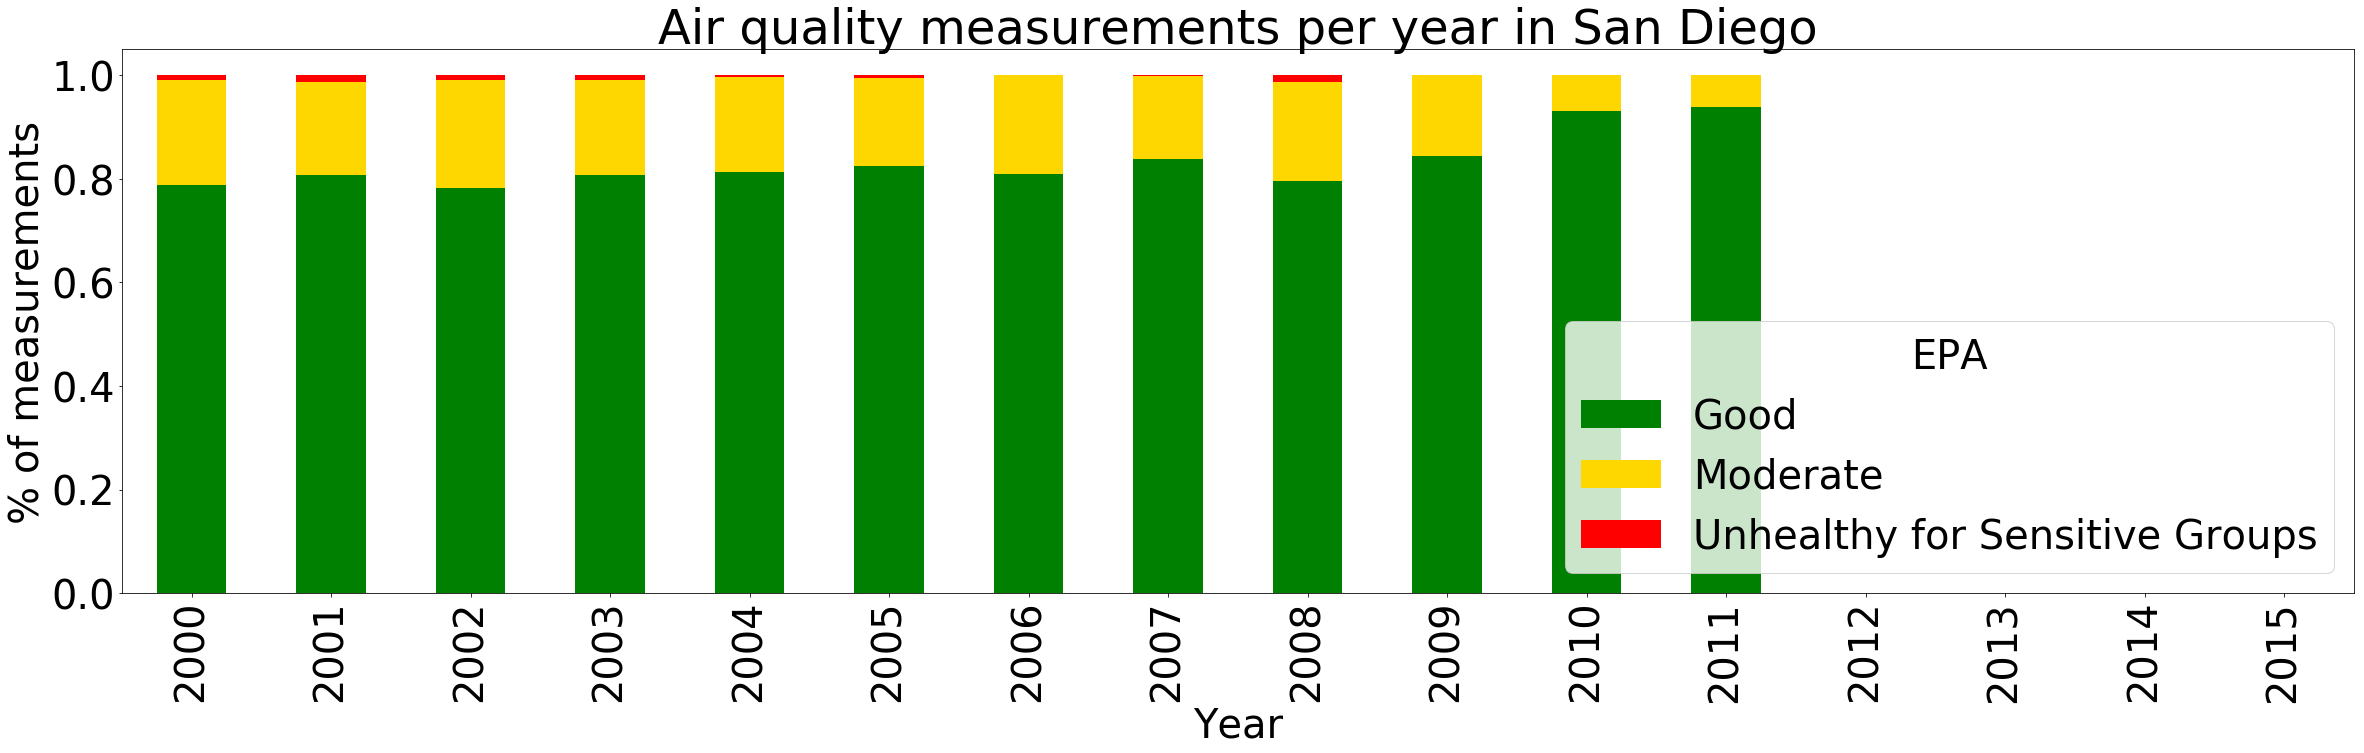

In [33]:
plot34(SD_EPA, SD_EPA_column,"San Diego")

## 3.5 AQI pollutant measurements in the most polluted cities in CA over time

In [34]:
Cities_CA=['Los Angeles', 'Long Beach', 'San Diego', 'Fresno','Carlsbad']
Cities_CA_df =  df.loc[df['City'].isin(Cities_CA)]
Cities_CA_df = Cities_CA_df[(Cities_CA_df['Date Local'].dt.year <= 2011) & (Cities_CA_df['Date Local'].dt.year >= 2007)]
NO2_AQI_ave=Cities_CA_df.groupby(['Year','City']).mean()['NO2 AQI'].unstack()
O3_AQI_ave=Cities_CA_df.groupby(['Year','City']).mean()['O3 AQI'].unstack()
SO2_AQI_ave=Cities_CA_df.groupby(['Year','City']).mean()['SO2 AQI'].unstack()
CO_AQI_ave=Cities_CA_df.groupby(['Year','City']).mean()['CO AQI'].unstack()

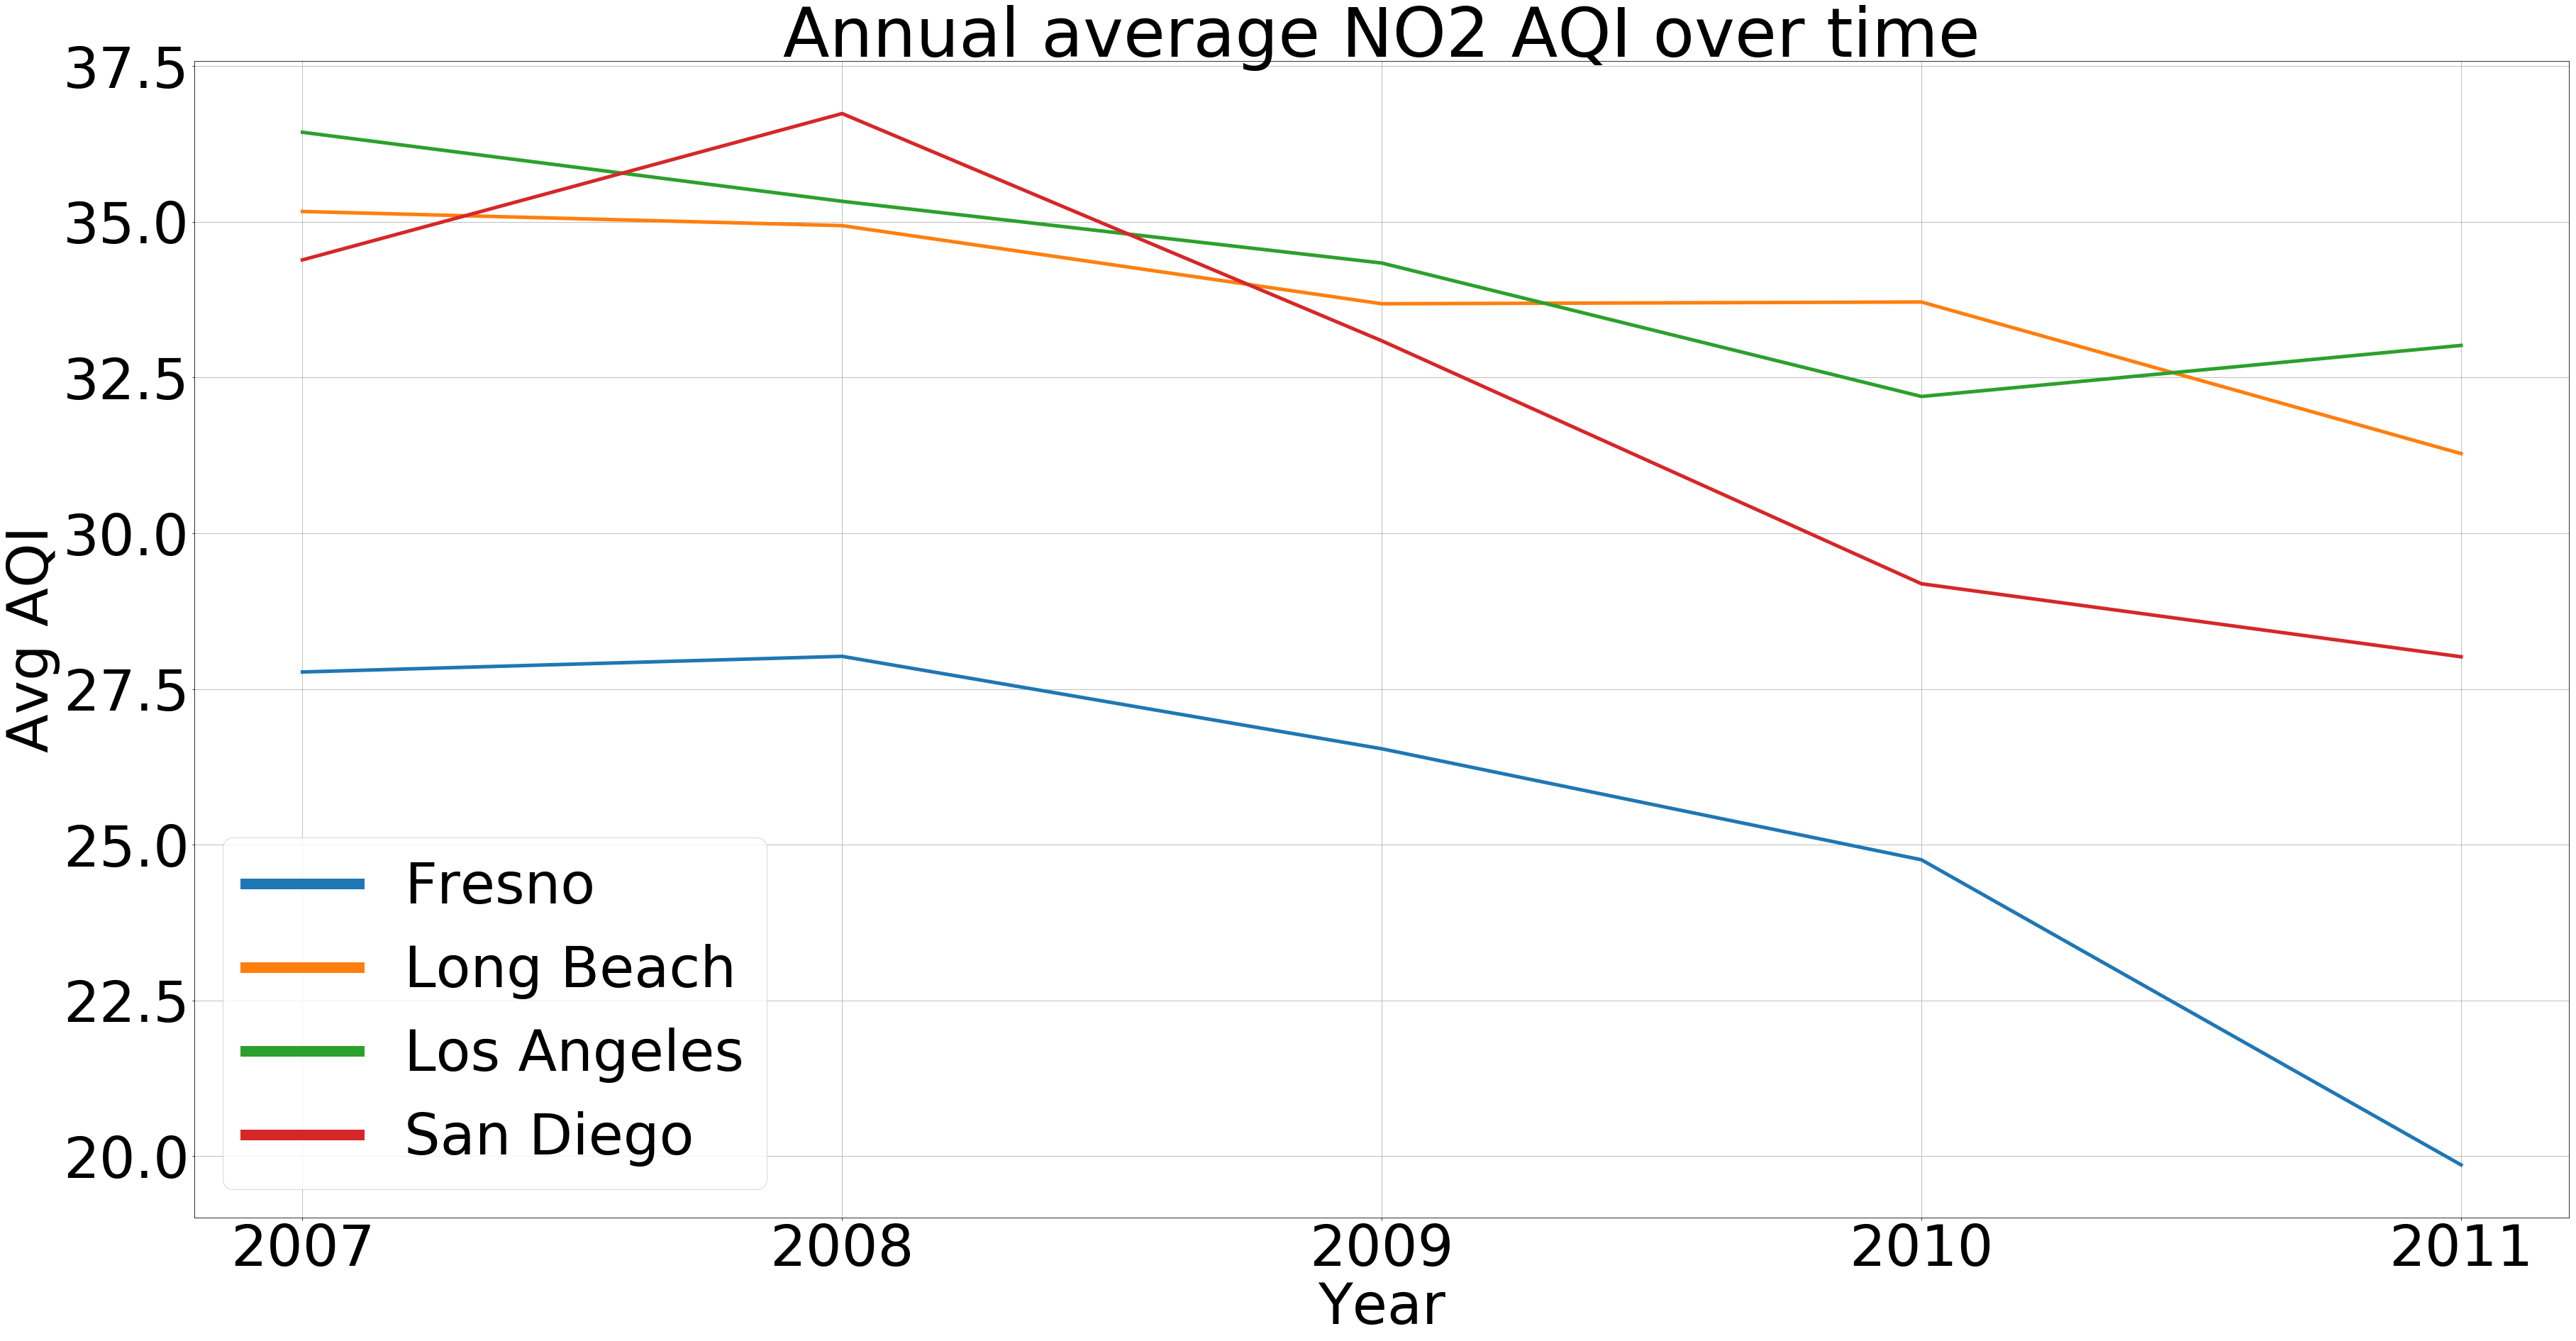

In [35]:
plot35(NO2_AQI_ave,"NO2")

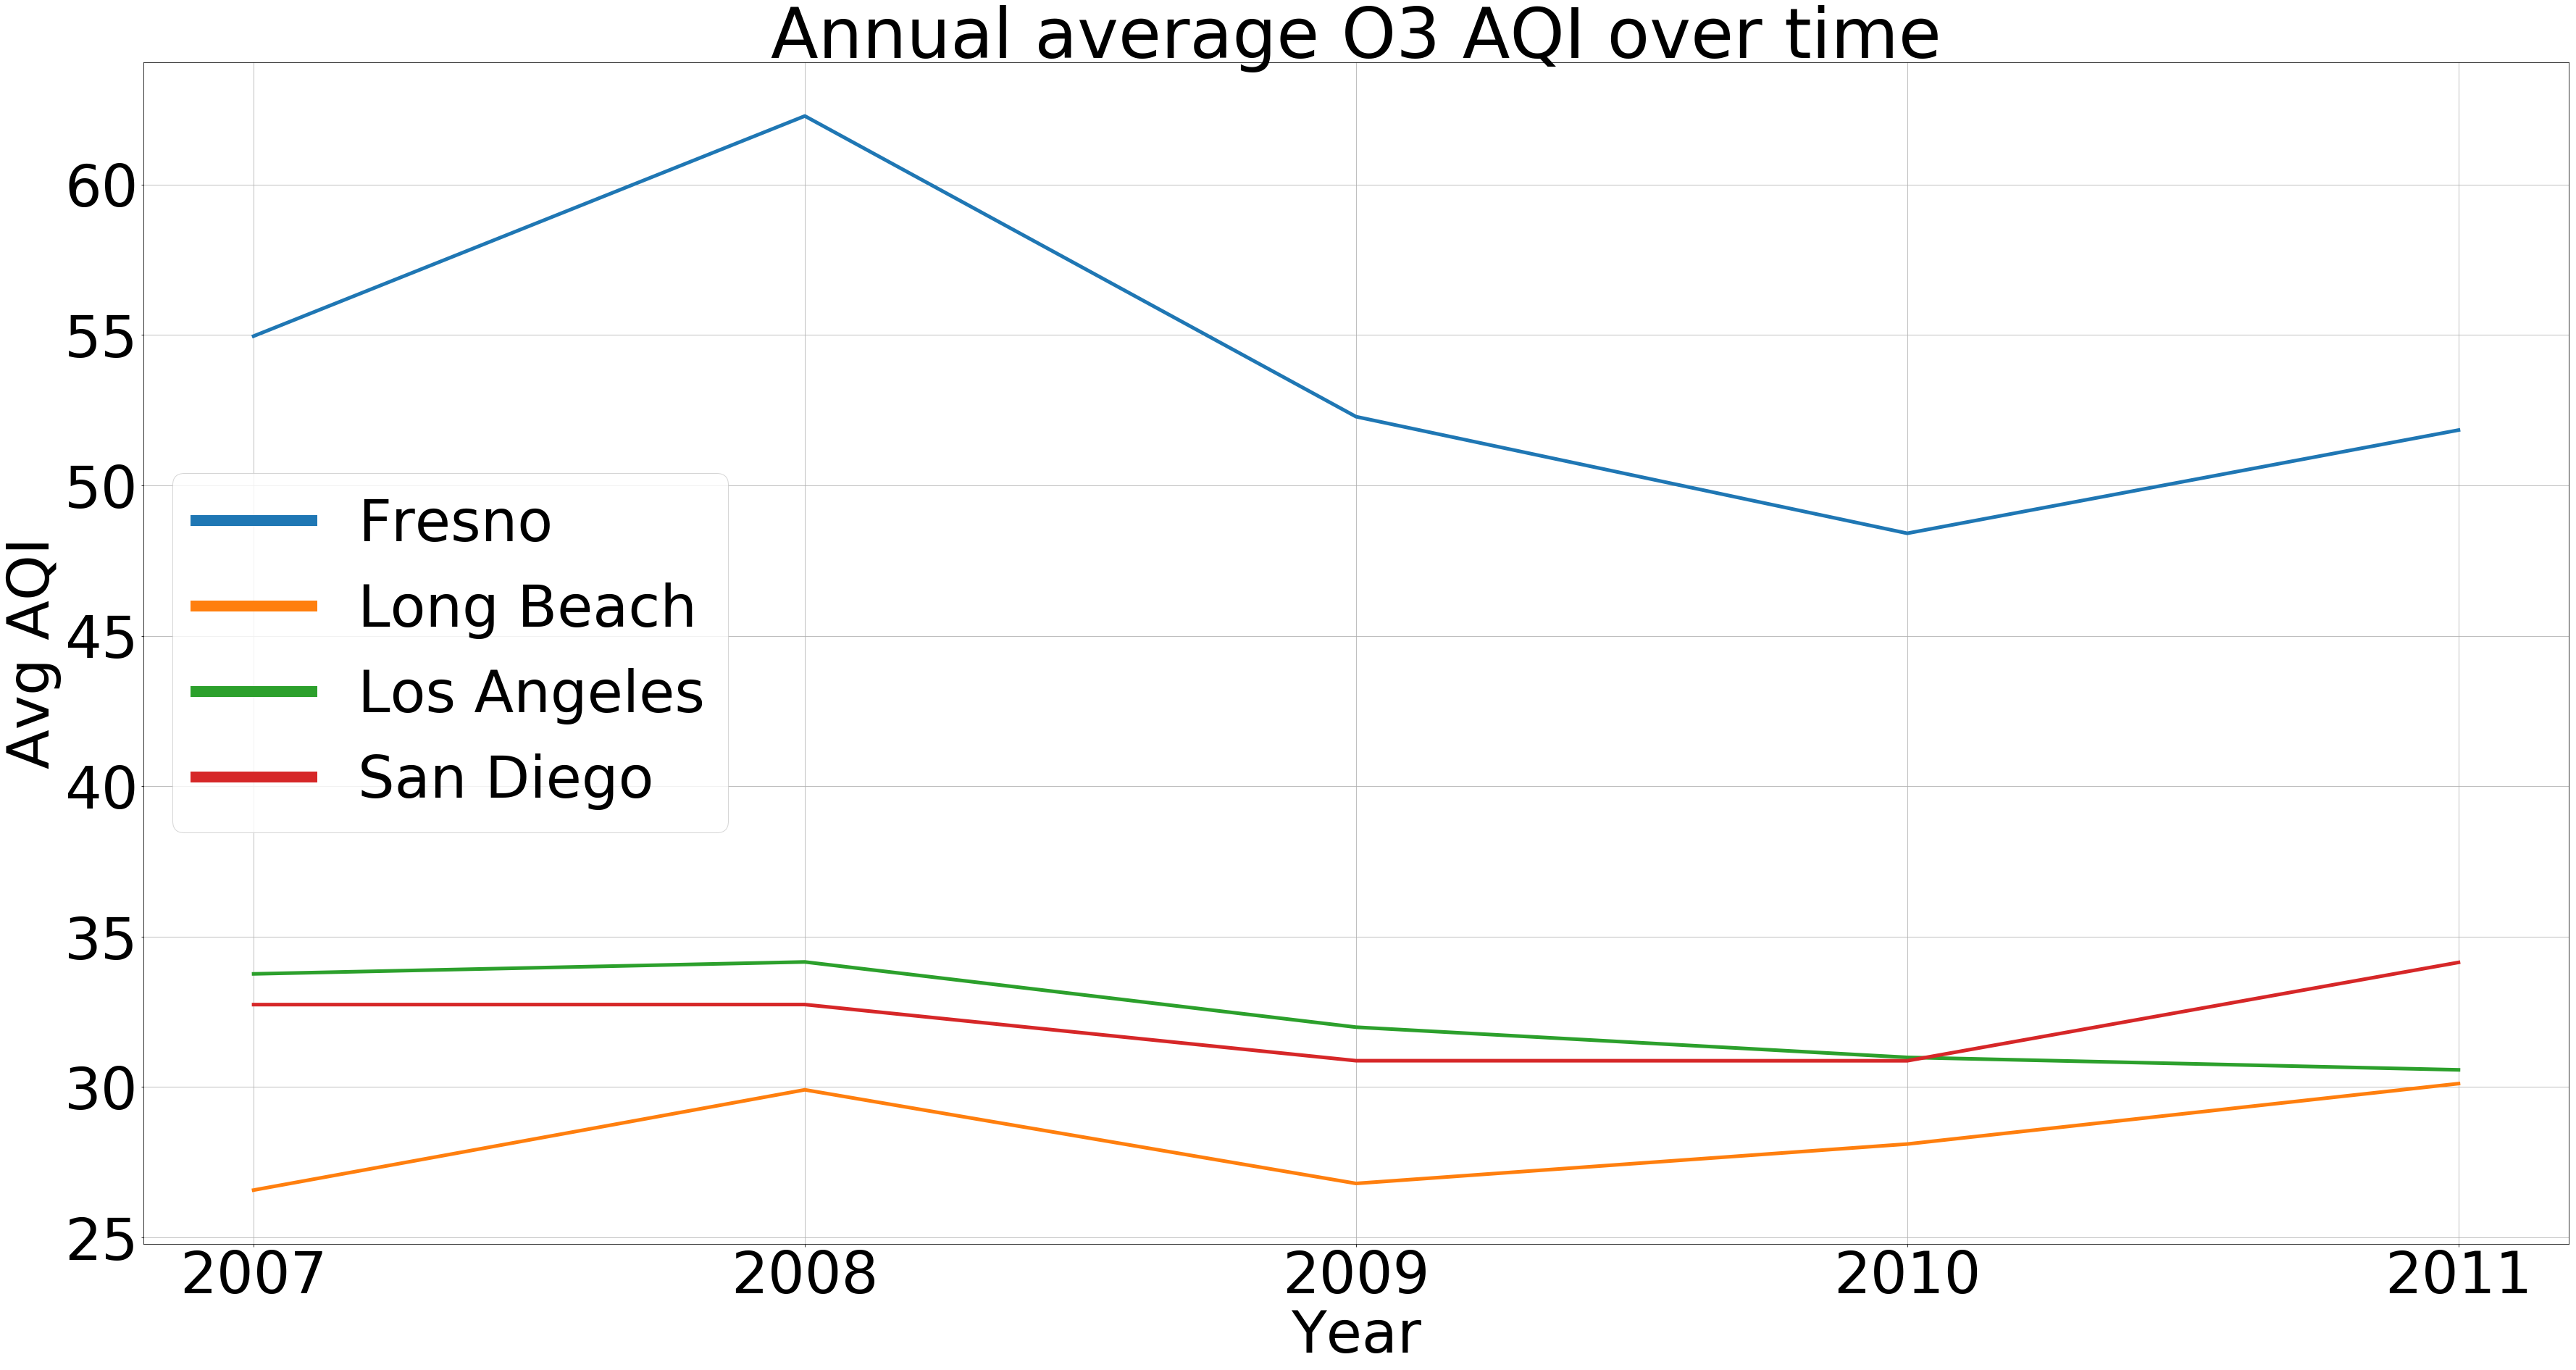

In [36]:
plot35(O3_AQI_ave,"O3")

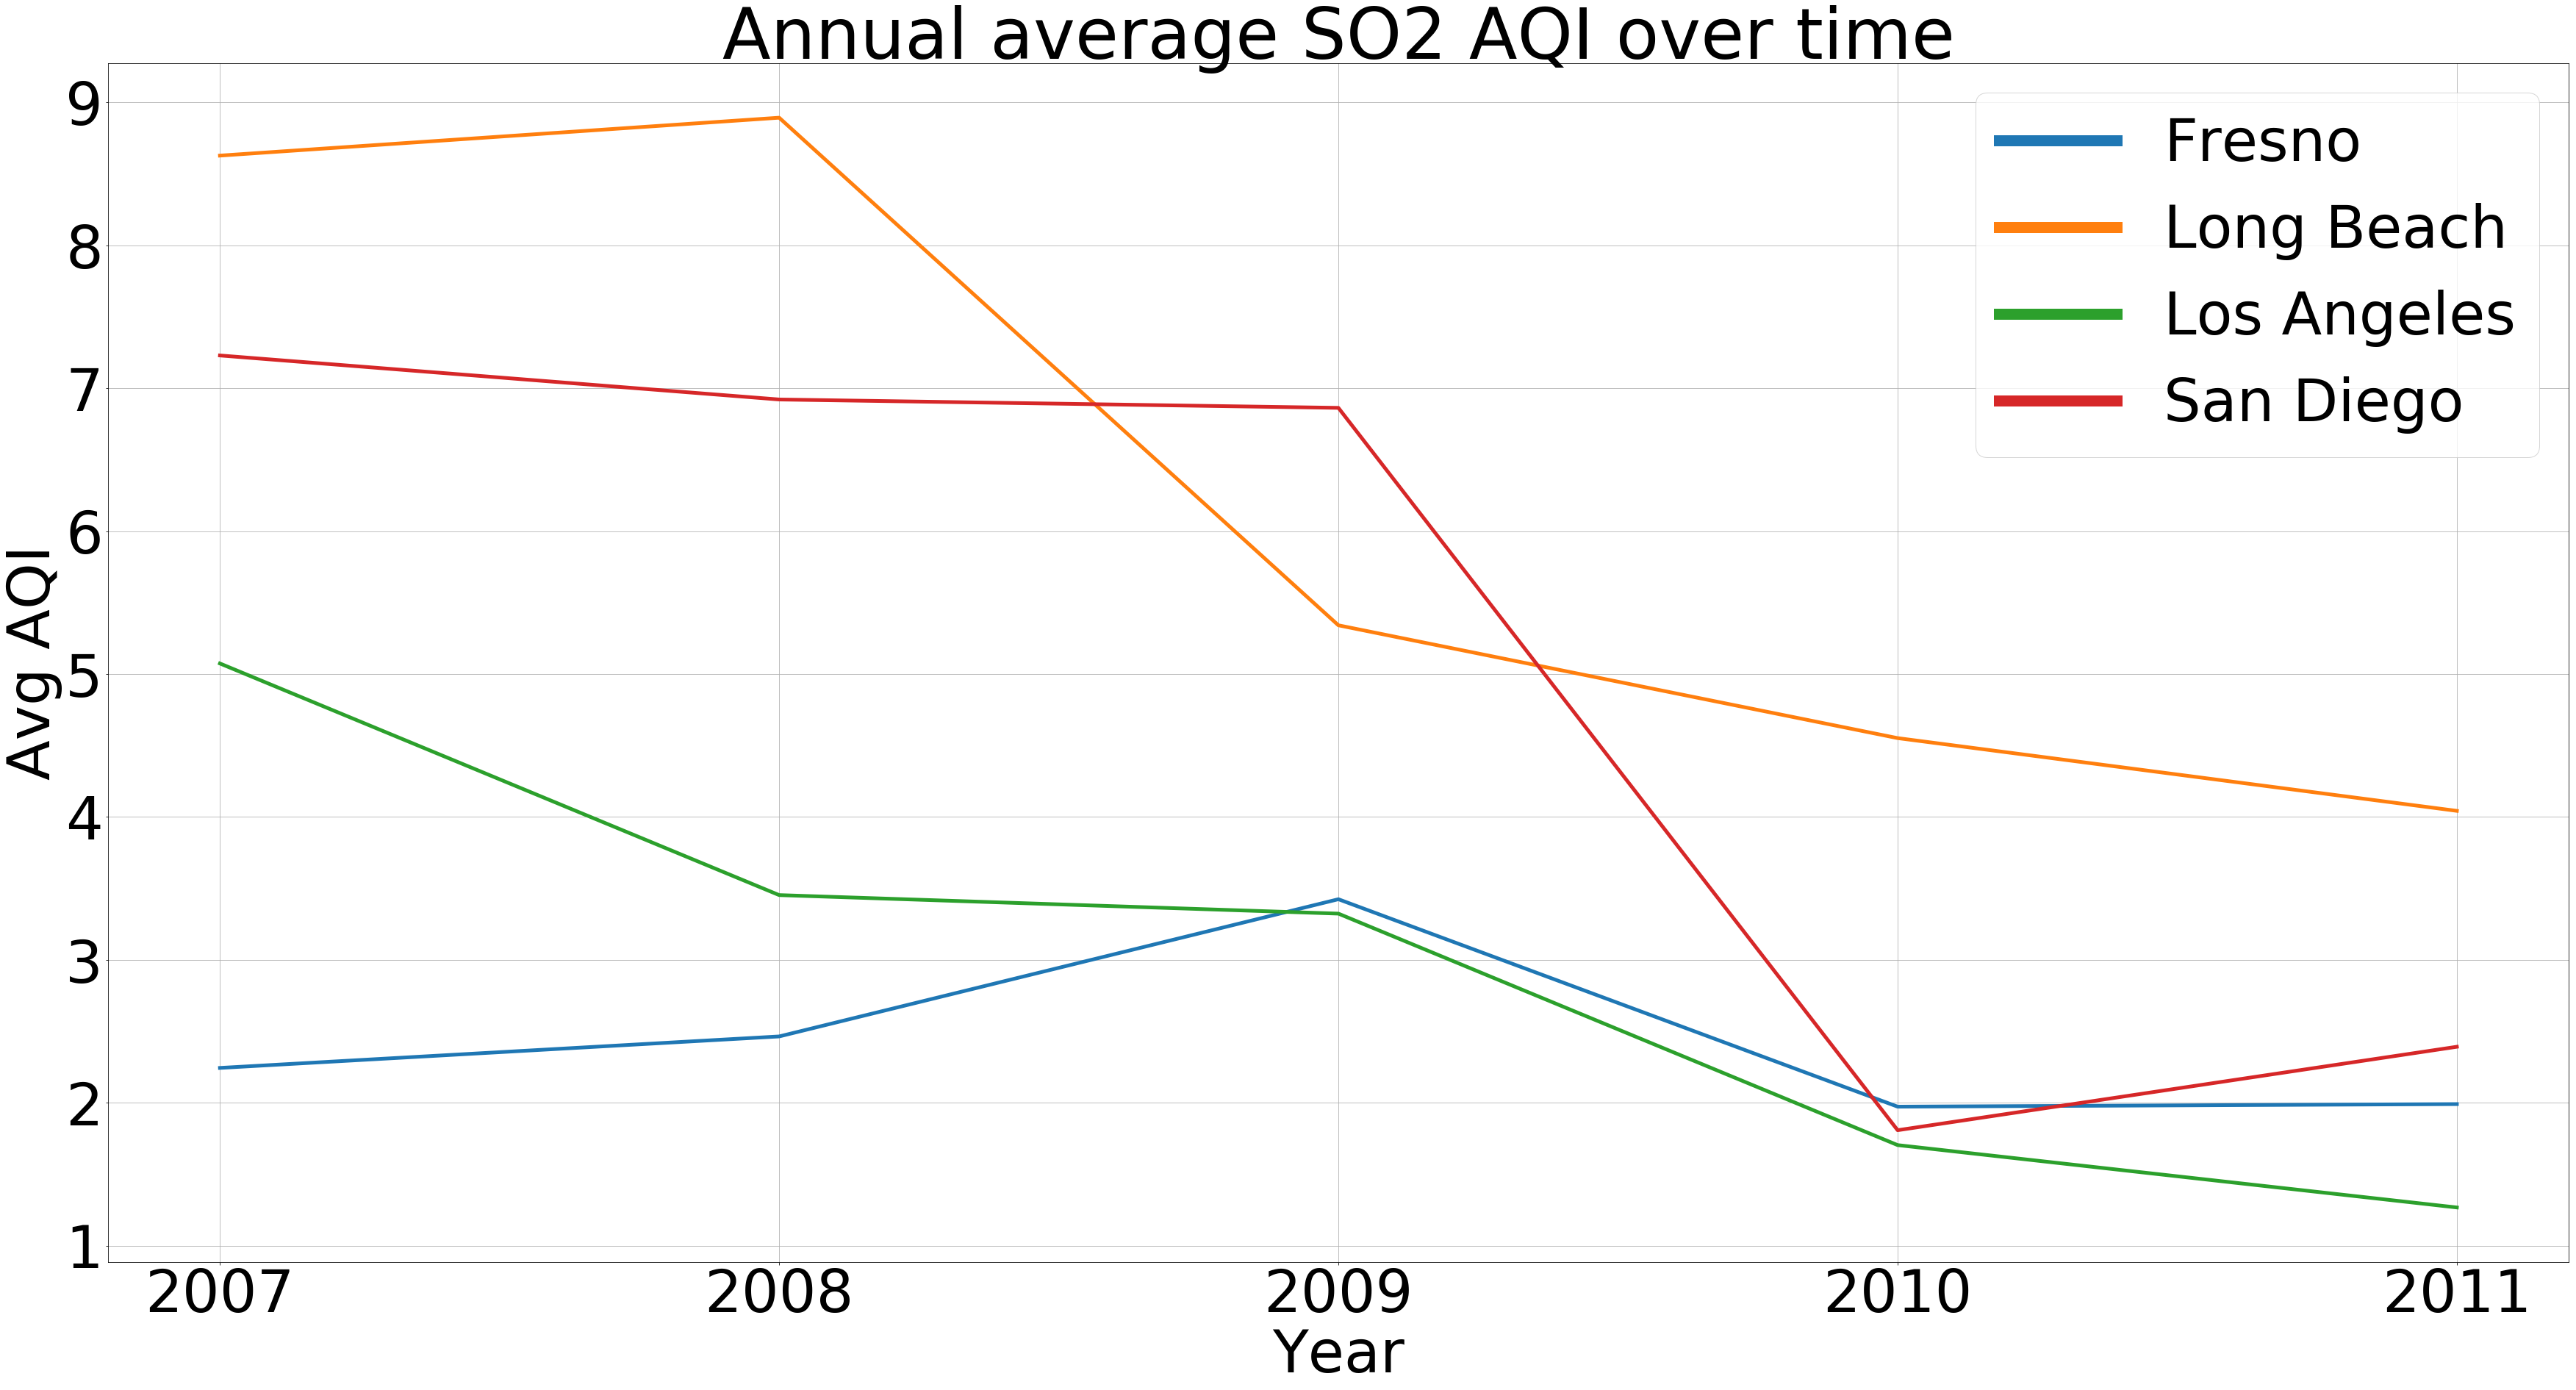

In [37]:
plot35(SO2_AQI_ave,"SO2")

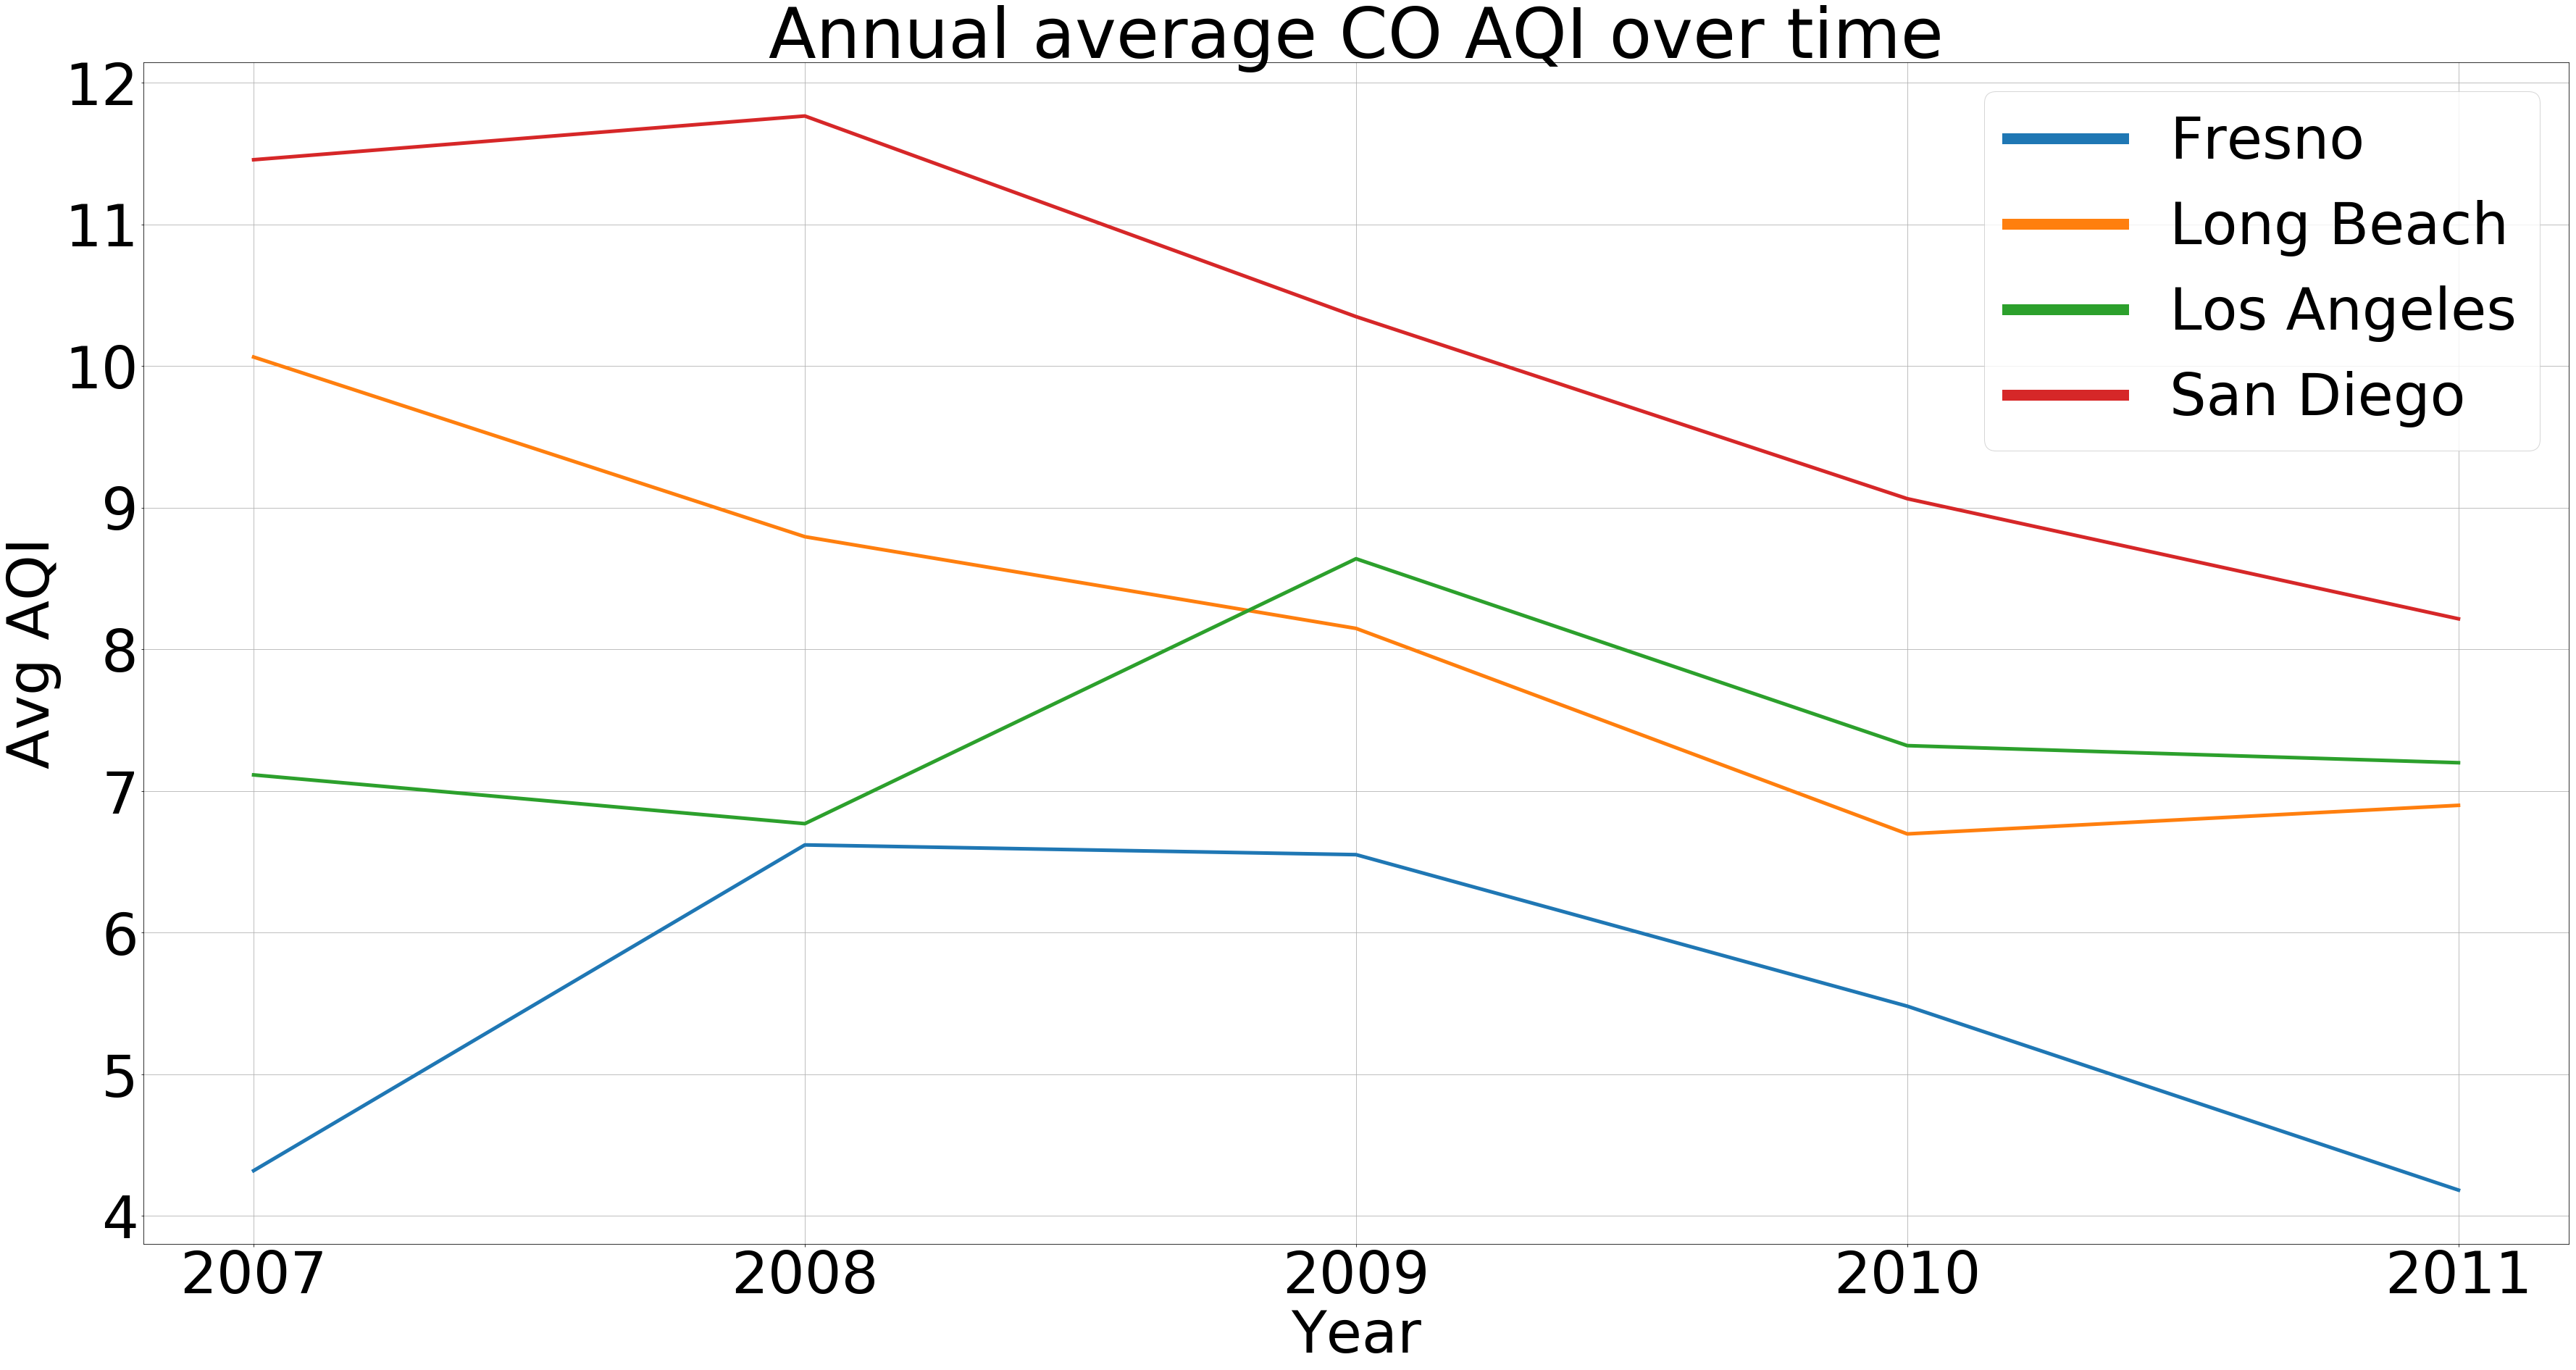

In [38]:
plot35(CO_AQI_ave,"CO")

## 3.6 Pollutant composition analysis

In [39]:
NO2_AQI_sum = df['NO2 AQI'].sum()
SO2_AQI_sum = df['SO2 AQI'].sum()
O3_AQI_sum = df['O3 AQI'].sum()
CO_AQI_sum = df['CO AQI'].sum()
all_air_sum= NO2_AQI_sum+SO2_AQI_sum+O3_AQI_sum+CO_AQI_sum
#print(NO2_AQI_sum,SO2_AQI_sum,O3_AQI_sum,CO_AQI_sum,all_air_sum)

size1= (NO2_AQI_sum/all_air_sum)*100
size2= (SO2_AQI_sum/all_air_sum)*100
size3= (O3_AQI_sum/all_air_sum)*100
size4= (CO_AQI_sum/all_air_sum)*100
#print(size1,size2,size3,size4)

recipe = ["NO2: %.1f"%(size1) + '%',
          "SO2: %.1f"%(size2) + '%',
          "O3: %.1f"%(size3) + '%',
          "CO: %.1f"%(size4) + '%']
data = [size1,size2,size3,size4]


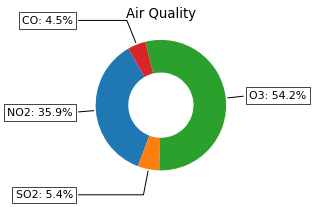

In [40]:
plot36(data,recipe)